In [1]:
%python -m kaggle datasets download -d ulrikthygepedersen/diamonds

UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).


In [4]:
!kaggle datasets download -d shivam2503/diamonds

diamonds.zip: Skipping, found more recently modified local copy (use --force to force download)


In [28]:
!tar -xf diamonds.zip
## rozpakowanie archiwum .zip w windowsie

In [3]:
import pandas as pd
diamonds = pd.read_csv('diamonds.csv')
#Wyświetlenie zbioru danych
diamonds

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

In [4]:
#przydzielanie nazwy kolumny z id
diamonds = diamonds.rename(columns={diamonds.columns[0]: 'id'})
diamonds

id  carat        cut color clarity  depth  table  price     x     y  \
0          1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1          2   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2          3   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07   
3          4   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4          5   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35   
...      ...    ...        ...   ...     ...    ...    ...    ...   ...   ...   
53935  53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76   
53936  53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75   
53937  53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68   
53938  53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12   
53939  53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87   

          z  
0      2.43  
1      2.31  
2      2.31  
3      2.63  
4      2.75  
...     ...  
53935  3.50  
53936  3.61  
53937  3.56  
53938  3.74  
53939  3.64  

[53940 rows x 11 columns]

In [5]:
#Convert to lowerCase

diamonds['cut'] = diamonds['cut'].str.lower()
diamonds



id  carat        cut color clarity  depth  table  price     x     y  \
0          1   0.23      ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1          2   0.21    premium     E     SI1   59.8   61.0    326  3.89  3.84   
2          3   0.23       good     E     VS1   56.9   65.0    327  4.05  4.07   
3          4   0.29    premium     I     VS2   62.4   58.0    334  4.20  4.23   
4          5   0.31       good     J     SI2   63.3   58.0    335  4.34  4.35   
...      ...    ...        ...   ...     ...    ...    ...    ...   ...   ...   
53935  53936   0.72      ideal     D     SI1   60.8   57.0   2757  5.75  5.76   
53936  53937   0.72       good     D     SI1   63.1   55.0   2757  5.69  5.75   
53937  53938   0.70  very good     D     SI1   62.8   60.0   2757  5.66  5.68   
53938  53939   0.86    premium     H     SI2   61.0   58.0   2757  6.15  6.12   
53939  53940   0.75      ideal     D     SI2   62.2   55.0   2757  5.83  5.87   

          z  
0      2.43  
1      2.31  
2      2.31  
3      2.63  
4      2.75  
...     ...  
53935  3.50  
53936  3.61  
53937  3.56  
53938  3.74  
53939  3.64  

[53940 rows x 11 columns]

In [6]:
import sklearn
from sklearn.model_selection import train_test_split

In [7]:
#podział danych na train/test/dev w proporcji 4:1:1
#losować ustawiona na 10

#1. Dzielimy na zbiór treningowy 80 % i resztę danych
diamonds_train, diamonds_test_dev = sklearn.model_selection.train_test_split(diamonds, test_size=0.2, random_state=10)

#2. Podział reszty danych na zbiór testowy 10% i walidacyjny 10%
diamonds_test, diamonds_dev = train_test_split(diamonds_test_dev, test_size=0.5, random_state=10)


In [8]:
#Wyświetlenie rozmiarów zbiorów danych train/test/dev
print("Rozmiar diamonds: ", diamonds.shape)
print("Rozmiar diamonds_train: ", diamonds_train.shape)
print("Rozmiar diamonds_test: ", diamonds_test.shape)
print("Rozmiar diamonds_dev: ", diamonds_dev.shape)


Rozmiar diamonds:  (53940, 11)
Rozmiar diamonds_train:  (43152, 11)
Rozmiar diamonds_test:  (5394, 11)
Rozmiar diamonds_dev:  (5394, 11)


In [9]:
# średnią, minimum, maksimum, odchylenia standardowe, medianę wartości poszczególnych parametrów)
print(diamonds.describe())

                 id         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000     

In [10]:
print(diamonds_train.describe())

                 id         carat         depth         table         price  \
count  43152.000000  43152.000000  43152.000000  43152.000000  43152.000000   
mean   26971.712111      0.795979     61.748241     57.448355   3920.786939   
std    15565.585777      0.472184      1.426394      2.224297   3975.894633   
min        3.000000      0.200000     43.000000     44.000000    327.000000   
25%    13469.750000      0.400000     61.000000     56.000000    946.000000   
50%    27019.500000      0.700000     61.800000     57.000000   2400.000000   
75%    40439.250000      1.040000     62.500000     59.000000   5313.250000   
max    53938.000000      5.010000     79.000000     76.000000  18823.000000   

                  x             y             z  
count  43152.000000  43152.000000  43152.000000  
mean       5.726933      5.731011      3.535791  
std        1.119635      1.147069      0.693846  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000     

In [11]:
print(diamonds_test.describe())

                 id        carat        depth        table         price  \
count   5394.000000  5394.000000  5394.000000  5394.000000   5394.000000   
mean   26951.351316     0.802666    61.760808    57.470189   3970.308676   
std    15565.740253     0.482062     1.464893     2.309900   4083.195823   
min        1.000000     0.210000    52.300000    43.000000    326.000000   
25%    13519.750000     0.400000    61.000000    56.000000    958.000000   
50%    27013.500000     0.700000    61.900000    57.000000   2375.500000   
75%    40342.250000     1.050000    62.500000    59.000000   5273.750000   
max    53930.000000     3.510000    78.200000    95.000000  18806.000000   

                 x            y            z  
count  5394.000000  5394.000000  5394.000000  
mean      5.738817     5.739106     3.542097  
std       1.132069     1.123925     0.701446  
min       3.840000     3.780000     0.000000  
25%       4.710000     4.710000     2.900000  
50%       5.690000     5.700000  

In [12]:
print(diamonds_dev.describe())

                 id        carat        depth        table         price  \
count   5394.000000  5394.000000  5394.000000  5394.000000   5394.000000   
mean   26979.951798     0.808901    61.747312    57.514813   3991.393029   
std    15625.161644     0.480344     1.449816     2.238671   4002.742530   
min        2.000000     0.200000    53.200000    51.000000    326.000000   
25%    13525.500000     0.400000    61.000000    56.000000    961.000000   
50%    26529.500000     0.710000    61.850000    57.000000   2484.500000   
75%    40665.500000     1.050000    62.500000    59.000000   5465.250000   
max    53940.000000     3.040000    73.600000    68.000000  18779.000000   

                 x            y            z  
count  5394.000000  5394.000000  5394.000000  
mean      5.757290     5.758066     3.558910  
std       1.128191     1.120344     0.797759  
min       3.790000     3.750000     0.000000  
25%       4.730000     4.740000     2.930000  
50%       5.710000     5.730000  

In [13]:
#Wyświetlenie częstości przykładów dla poszczególnych klas diamentów
diamonds_train["cut"].value_counts()

ideal        17292
premium      10954
very good     9708
good          3929
fair          1269
Name: cut, dtype: int64

In [14]:
diamonds_test["cut"].value_counts()

ideal        2184
premium      1385
very good    1183
good          473
fair          169
Name: cut, dtype: int64

In [15]:
diamonds_dev["cut"].value_counts()

ideal        2075
premium      1452
very good    1191
good          504
fair          172
Name: cut, dtype: int64

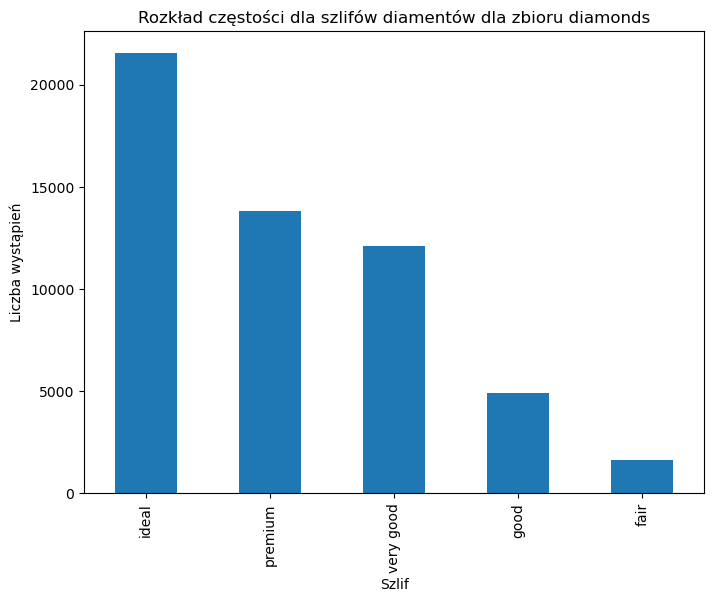

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
diamonds['cut'].value_counts().plot(kind='bar')
plt.title('Rozkład częstości dla szlifów diamentów dla zbioru diamonds')
plt.xlabel('Szlif')
plt.ylabel('Liczba wystąpień')
plt.show()

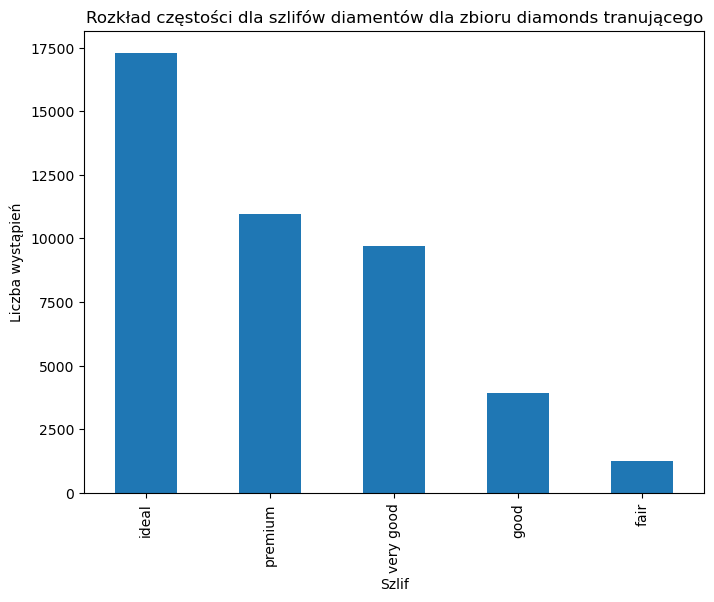

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
diamonds_train['cut'].value_counts().plot(kind='bar')
plt.title('Rozkład częstości dla szlifów diamentów dla zbioru diamonds tranującego')
plt.xlabel('Szlif')
plt.ylabel('Liczba wystąpień')
plt.show()

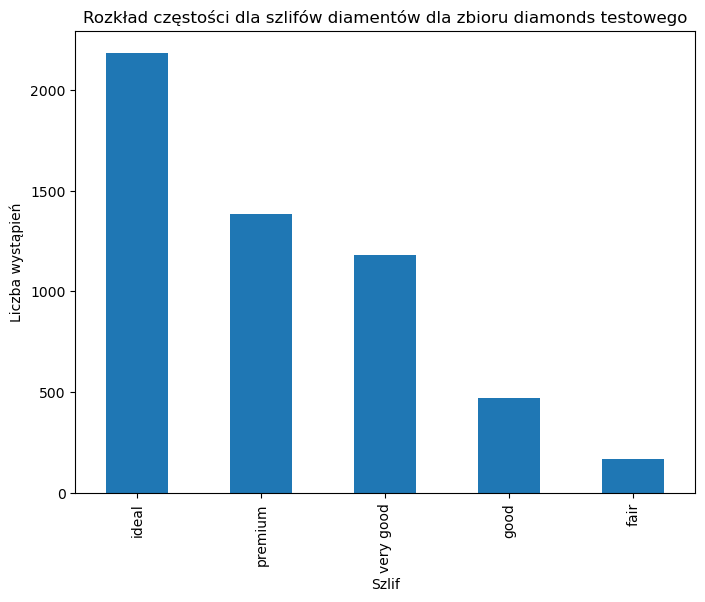

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
diamonds_test['cut'].value_counts().plot(kind='bar')
plt.title('Rozkład częstości dla szlifów diamentów dla zbioru diamonds testowego')
plt.xlabel('Szlif')
plt.ylabel('Liczba wystąpień')
plt.show()

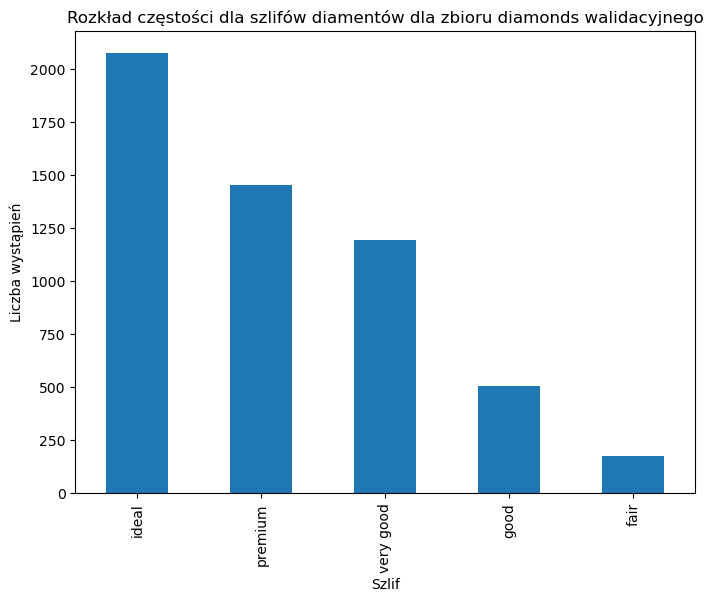

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
diamonds_dev['cut'].value_counts().plot(kind='bar')
plt.title('Rozkład częstości dla szlifów diamentów dla zbioru diamonds walidacyjnego')
plt.xlabel('Szlif')
plt.ylabel('Liczba wystąpień')
plt.show()

In [20]:
diamonds[["cut","carat"]].groupby("cut").std()

carat
cut                
fair       0.516404
good       0.454054
ideal      0.432876
premium    0.515262
very good  0.459435

<Axes: xlabel='cut'>

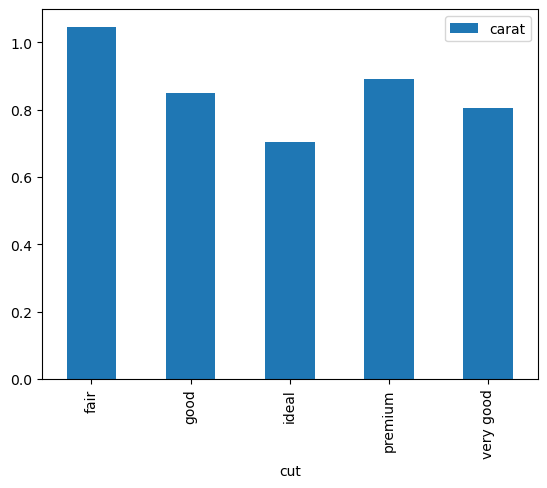

In [21]:
diamonds[["cut","carat"]].groupby("cut").mean().plot(kind="bar")

In [22]:
#normalizacja wartości typu float do zakrsu 0.0 - 1.0
#Powyżej wykonano jeszcze konwersję danych typu string na lowerCase

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
diamonds[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']] = scaler.fit_transform(diamonds[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])

#wyświetlenie zbioru
diamonds

id     carat        cut color clarity     depth     table     price  \
0          1  0.006237      ideal     E     SI2  0.513889  0.230769  0.000000   
1          2  0.002079    premium     E     SI1  0.466667  0.346154  0.000000   
2          3  0.006237       good     E     VS1  0.386111  0.423077  0.000054   
3          4  0.018711    premium     I     VS2  0.538889  0.288462  0.000433   
4          5  0.022869       good     J     SI2  0.563889  0.288462  0.000487   
...      ...       ...        ...   ...     ...       ...       ...       ...   
53935  53936  0.108108      ideal     D     SI1  0.494444  0.269231  0.131427   
53936  53937  0.108108       good     D     SI1  0.558333  0.230769  0.131427   
53937  53938  0.103950  very good     D     SI1  0.550000  0.326923  0.131427   
53938  53939  0.137214    premium     H     SI2  0.500000  0.288462  0.131427   
53939  53940  0.114345      ideal     D     SI2  0.533333  0.230769  0.131427   

              x         y         z  
0      0.367784  0.067572  0.076415  
1      0.362197  0.065195  0.072642  
2      0.377095  0.069100  0.072642  
3      0.391061  0.071817  0.082704  
4      0.404097  0.073854  0.086478  
...         ...       ...       ...  
53935  0.535382  0.097793  0.110063  
53936  0.529795  0.097623  0.113522  
53937  0.527002  0.096435  0.111950  
53938  0.572626  0.103905  0.117610  
53939  0.542831  0.099660  0.114465  

[53940 rows x 11 columns]

In [23]:
# Usuwanie artefaktów
diamonds = diamonds.dropna() ## usuwanie pustych wierszy, które posiadają przynajmniej jedno wystąpienie NULL or NaN
diamonds

id     carat        cut color clarity     depth     table     price  \
0          1  0.006237      ideal     E     SI2  0.513889  0.230769  0.000000   
1          2  0.002079    premium     E     SI1  0.466667  0.346154  0.000000   
2          3  0.006237       good     E     VS1  0.386111  0.423077  0.000054   
3          4  0.018711    premium     I     VS2  0.538889  0.288462  0.000433   
4          5  0.022869       good     J     SI2  0.563889  0.288462  0.000487   
...      ...       ...        ...   ...     ...       ...       ...       ...   
53935  53936  0.108108      ideal     D     SI1  0.494444  0.269231  0.131427   
53936  53937  0.108108       good     D     SI1  0.558333  0.230769  0.131427   
53937  53938  0.103950  very good     D     SI1  0.550000  0.326923  0.131427   
53938  53939  0.137214    premium     H     SI2  0.500000  0.288462  0.131427   
53939  53940  0.114345      ideal     D     SI2  0.533333  0.230769  0.131427   

              x         y         z  
0      0.367784  0.067572  0.076415  
1      0.362197  0.065195  0.072642  
2      0.377095  0.069100  0.072642  
3      0.391061  0.071817  0.082704  
4      0.404097  0.073854  0.086478  
...         ...       ...       ...  
53935  0.535382  0.097793  0.110063  
53936  0.529795  0.097623  0.113522  
53937  0.527002  0.096435  0.111950  
53938  0.572626  0.103905  0.117610  
53939  0.542831  0.099660  0.114465  

[53940 rows x 11 columns]

#### Zapisanie zbiorów danych do pliku csv (na potrzeby zadania z LAB 5 - BIBLIOTEKI DL)

In [31]:
import os

directory ='dane'
if not os.path.exists(directory):
    os.makedirs('dane')

diamonds.to_csv('dane/diamonds.csv', index=False)
diamonds_train.to_csv('dane/diamonds_train.csv', index=False)
diamonds_test.to_csv('dane/diamonds_test.csv', index=False)
diamonds_dev.to_csv('dane/diamonds_dev.csv', index=False)